In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, roc_curve,auc,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
def run_classifier(clf,Clasifier_name):
    ##Original Data
    clf.fit(data_features_train, data_labels_train.ravel())
    test_results = clf.predict(data_features_test)
    print('---------------------Original Data*')
    print_results(test_results)
    fpr, tpr,_=roc_curve(test_results,data_labels_test,drop_intermediate=False)
    draw_roc(fpr,tpr,Clasifier_name+' with Original data')

    ##SMOTE Oversampling
    clf.fit(x_train_smote, y_train_smote.ravel())
    test_results = clf.predict(data_features_test)
    print('---------------------SMOTE OverSampling*')
    print_results(test_results)
    fpr, tpr,_=roc_curve(test_results,data_labels_test,drop_intermediate=False)
    draw_roc(fpr,tpr,Clasifier_name+' with SMOTE OverSampling')

    ##Random Undersampling
    clf.fit(x_train_rus, y_train_rus.ravel())
    test_results = clf.predict(data_features_test)
    print('---------------------Random OverSampling*')
    print_results(test_results)
    fpr, tpr,_=roc_curve(test_results,data_labels_test,drop_intermediate=False)
    draw_roc(fpr,tpr,Clasifier_name+' with Random UnderSampling')

In [3]:
def print_results(test_results):
    print('Accuracy','{:.2%}'.format(clf.score(data_features_test, data_labels_test)),' *Inaccurate metric for imbalanced class')
    print('Recall Score','{:.3}'.format(recall_score(data_labels_test, test_results)))
    print('Precision Score','{:.3}'.format(precision_score(data_labels_test, test_results)))
    print('AUC Score','{:.3}'.format(roc_auc_score(test_results,data_labels_test)))
    print('Confusion Matrix')
    print(confusion_matrix(data_labels_test,test_results))

In [4]:
def draw_roc(fpr,tpr,title):
    plt.figure()
    ##Adding the ROC
    plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')
    ##Random FPR and TPR
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    ##Title and label
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve for '+title)
    plt.show()

In [5]:
data = pd.read_csv("creditcard.csv")

In [6]:
data.iloc[0]

Time        0.000000
V1         -1.359807
V2         -0.072781
V3          2.536347
V4          1.378155
V5         -0.338321
V6          0.462388
V7          0.239599
V8          0.098698
V9          0.363787
V10         0.090794
V11        -0.551600
V12        -0.617801
V13        -0.991390
V14        -0.311169
V15         1.468177
V16        -0.470401
V17         0.207971
V18         0.025791
V19         0.403993
V20         0.251412
V21        -0.018307
V22         0.277838
V23        -0.110474
V24         0.066928
V25         0.128539
V26        -0.189115
V27         0.133558
V28        -0.021053
Amount    149.620000
Class       0.000000
Name: 0, dtype: float64

In [7]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# before starting we should standridze our amount column
data["Normalized Amount"] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data.drop(["Time","Amount"],axis=1,inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
def data_prepration(x): # preparing data for training and testing as we are going to use different data 
    #again and again so make a function
    x_features= x.loc[:,x.columns != "Class"]
    x_labels=x.loc[:,x.columns=="Class"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("Length of Training data:",len(x_features_train))
    print("Length of Test data:",len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train.values,x_labels_test.values)

In [10]:
# Test Train Split ALL FEATURES INCLUDED
data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(data) 

Length of Training data: 199364
Length of Test data: 85443


In [11]:
# SMOTE Oversampling on data ALL FEATURES INCLUDED
sm = SMOTE(random_state=12, ratio = 'minority')
x_train_smote, y_train_smote = sm.fit_sample(data_features_train, data_labels_train.ravel())

In [12]:
# Random Undersampling on data ALL FEATURES INCLUDED
rus = RandomUnderSampler(random_state=12)
x_train_rus, y_train_rus = rus.fit_sample(data_features_train, data_labels_train.ravel())

Extracting important features using random forest before resampling

---------------------Original Data*
Accuracy 99.95%  *Inaccurate metric for imbalanced class
Recall Score 0.772
Precision Score 0.933
AUC Score 0.966
Confusion Matrix
[[85290     8]
 [   33   112]]


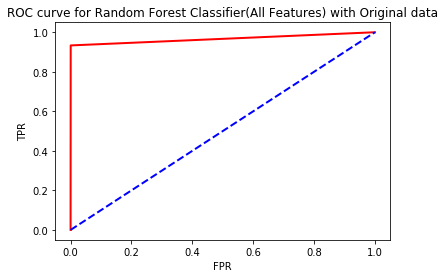

---------------------SMOTE OverSampling*
Accuracy 99.94%  *Inaccurate metric for imbalanced class
Recall Score 0.786
Precision Score 0.844
AUC Score 0.922
Confusion Matrix
[[85277    21]
 [   31   114]]


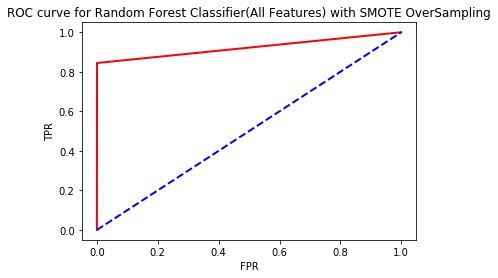

---------------------Random OverSampling*
Accuracy 97.57%  *Inaccurate metric for imbalanced class
Recall Score 0.89
Precision Score 0.059
AUC Score 0.529
Confusion Matrix
[[83239  2059]
 [   16   129]]


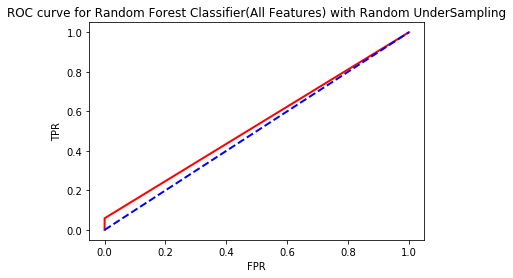

In [13]:
clf=RandomForestClassifier(n_estimators=100, random_state=12)
run_classifier(clf,"Random Forest Classifier(All Features)")

In [14]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = data_features_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [15]:
feature_importances

,importance
V14,0.181558
V10,0.156782
V11,0.109173
V12,0.082357
V17,0.079607
V4,0.079107
V3,0.066909
V16,0.024486
V7,0.022843
V2,0.021912


---------------------Original Data*
Accuracy 97.80%  *Inaccurate metric for imbalanced class
Recall Score 0.897
Precision Score 0.0651
AUC Score 0.532
Confusion Matrix
[[83431  1867]
 [   15   130]]


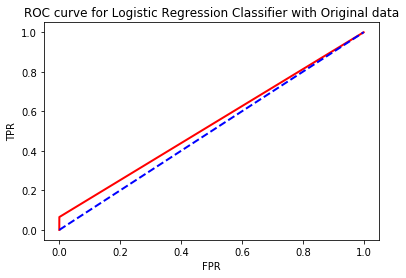

---------------------SMOTE OverSampling*
Accuracy 97.57%  *Inaccurate metric for imbalanced class
Recall Score 0.897
Precision Score 0.0593
AUC Score 0.53
Confusion Matrix
[[83237  2061]
 [   15   130]]


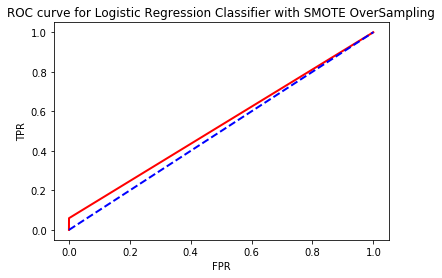

---------------------Random OverSampling*
Accuracy 95.45%  *Inaccurate metric for imbalanced class
Recall Score 0.903
Precision Score 0.0327
AUC Score 0.516
Confusion Matrix
[[81424  3874]
 [   14   131]]


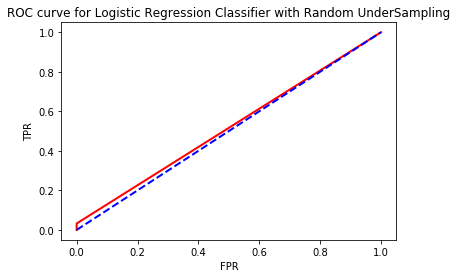

In [16]:
clf = LogisticRegression(class_weight='balanced', C = 0.01,penalty = 'l2')
run_classifier(clf,"Logistic Regression Classifier")

In [17]:
#MOST RELAVANT FEATURES
data1=data[["V14","V10","V12","V17","V11","Class"]]
data1.head()

,V14,V10,V12,V17,V11,Class
0,-0.311169,0.090794,-0.617801,0.207971,-0.551600,0
1,-0.143772,-0.166974,1.065235,-0.114805,1.612727,0
2,-0.165946,0.207643,0.066084,1.109969,0.624501,0
3,-0.287924,-0.054952,0.178228,-0.684093,-0.226487,0
4,-1.119670,0.753074,0.538196,-0.237033,-0.822843,0


Oversampling only on the training data(Using SMOTE)

In [18]:
# Test Train split MOST RELAVANT FEATURES
data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(data1) 

Length of Training data: 199364
Length of Test data: 85443


In [19]:
# SMOTE Oversampling on data MOST RELAVANT FEATURES
sm = SMOTE(random_state=12, ratio = 'minority')
x_train_smote, y_train_smote = sm.fit_sample(data_features_train, data_labels_train.ravel())

In [20]:
# Random Undersampling on data MOST RELAVANT FEATURES
rus = RandomUnderSampler(random_state=12)
x_train_rus, y_train_rus = rus.fit_sample(data_features_train, data_labels_train.ravel())

---------------------Original Data*
Accuracy 99.95%  *Inaccurate metric for imbalanced class
Recall Score 0.831
Precision Score 0.879
AUC Score 0.939
Confusion Matrix
[[85278    17]
 [   25   123]]


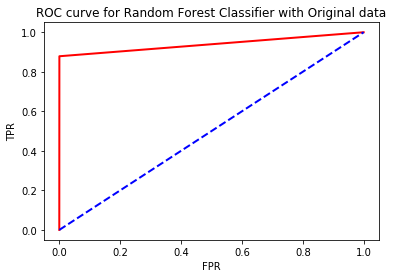

---------------------SMOTE OverSampling*
Accuracy 99.83%  *Inaccurate metric for imbalanced class
Recall Score 0.858
Precision Score 0.504
AUC Score 0.752
Confusion Matrix
[[85170   125]
 [   21   127]]


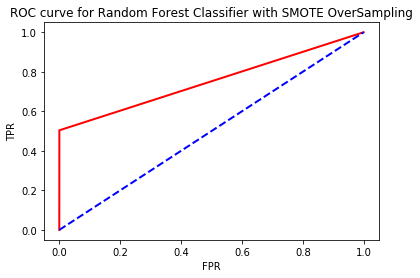

---------------------Random OverSampling*
Accuracy 95.24%  *Inaccurate metric for imbalanced class
Recall Score 0.905
Precision Score 0.032
AUC Score 0.516
Confusion Matrix
[[81244  4051]
 [   14   134]]


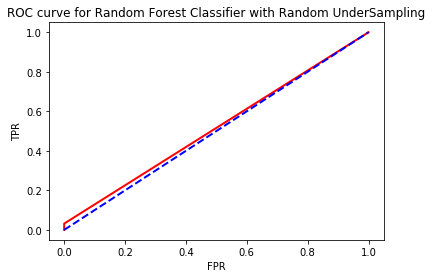

In [21]:
clf = RandomForestClassifier(n_estimators=100, random_state=12,criterion='gini')
run_classifier(clf,"Random Forest Classifier")

Ensemble methods for unbalanced classes - Balanced bagging classifier

---------------------Original Data*
Accuracy 97.26%  *Inaccurate metric for imbalanced class
Recall Score 0.905
Precision Score 0.0545
AUC Score 0.527
Confusion Matrix
[[82970  2325]
 [   14   134]]


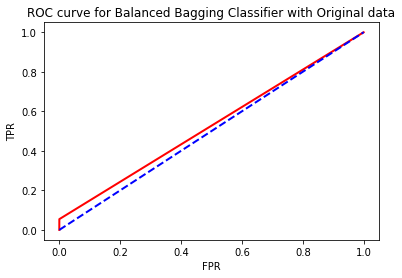

---------------------SMOTE OverSampling*
Accuracy 99.71%  *Inaccurate metric for imbalanced class
Recall Score 0.851
Precision Score 0.36
AUC Score 0.68
Confusion Matrix
[[85071   224]
 [   22   126]]


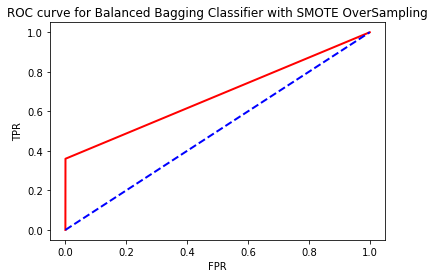

---------------------Random OverSampling*
Accuracy 94.51%  *Inaccurate metric for imbalanced class
Recall Score 0.885
Precision Score 0.0273
AUC Score 0.514
Confusion Matrix
[[80624  4671]
 [   17   131]]


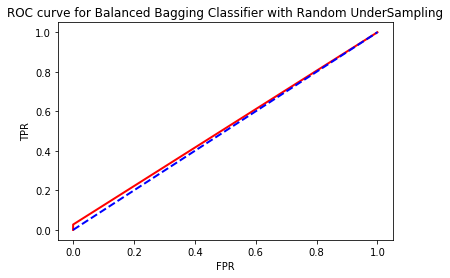

In [22]:
clf = BalancedBaggingClassifier(random_state=12)
run_classifier(clf,"Balanced Bagging Classifier")

Logistic Regression

---------------------Original Data*
Accuracy 97.78%  *Inaccurate metric for imbalanced class
Recall Score 0.905
Precision Score 0.0664
AUC Score 0.533
Confusion Matrix
[[83411  1884]
 [   14   134]]


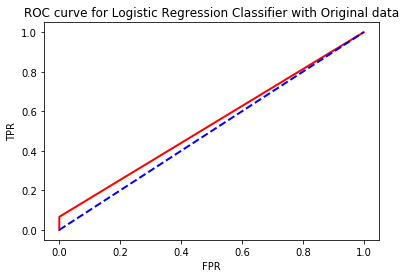

---------------------SMOTE OverSampling*
Accuracy 97.74%  *Inaccurate metric for imbalanced class
Recall Score 0.905
Precision Score 0.0654
AUC Score 0.533
Confusion Matrix
[[83379  1916]
 [   14   134]]


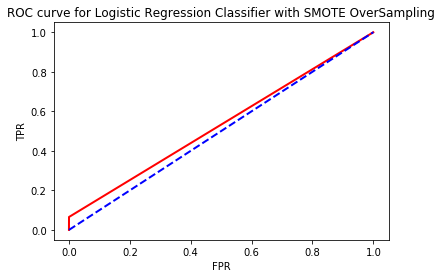

---------------------Random OverSampling*
Accuracy 96.30%  *Inaccurate metric for imbalanced class
Recall Score 0.919
Precision Score 0.0413
AUC Score 0.521
Confusion Matrix
[[82142  3153]
 [   12   136]]


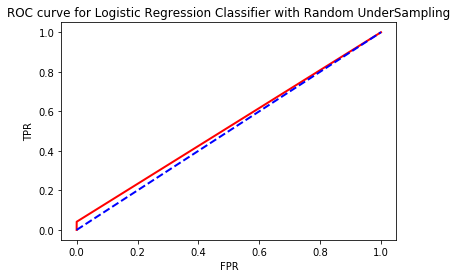

In [23]:
clf = LogisticRegression(class_weight='balanced', C = 0.01,penalty = 'l2')
run_classifier(clf,"Logistic Regression Classifier")

XGBoost 

---------------------Original Data*
Accuracy 99.63%  *Inaccurate metric for imbalanced class
Recall Score 0.0338
Precision Score 0.0275
AUC Score 0.513
Confusion Matrix
[[85118   177]
 [  143     5]]


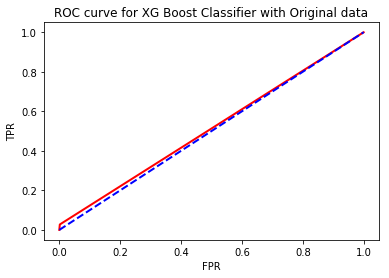

---------------------SMOTE OverSampling*
Accuracy 96.80%  *Inaccurate metric for imbalanced class
Recall Score 0.905
Precision Score 0.0469
AUC Score 0.523
Confusion Matrix
[[82573  2722]
 [   14   134]]


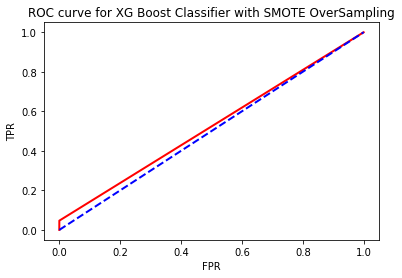

---------------------Random OverSampling*
Accuracy 95.38%  *Inaccurate metric for imbalanced class
Recall Score 0.905
Precision Score 0.0329
AUC Score 0.516
Confusion Matrix
[[81358  3937]
 [   14   134]]


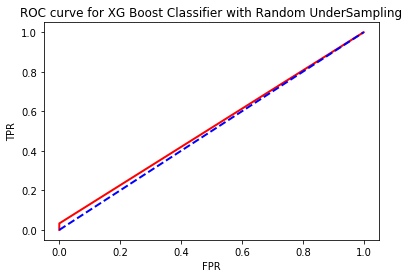

In [24]:
clf = GradientBoostingClassifier(learning_rate=0.15, n_estimators=100, min_samples_split=0.5, min_samples_leaf=45, max_depth=8,max_features ='sqrt',subsample =0.8)
run_classifier(clf,"XG Boost Classifier")

---------------------Original Data*
Accuracy 99.95%  *Inaccurate metric for imbalanced class
Recall Score 0.838
Precision Score 0.879
AUC Score 0.94
Confusion Matrix
[[85278    17]
 [   24   124]]


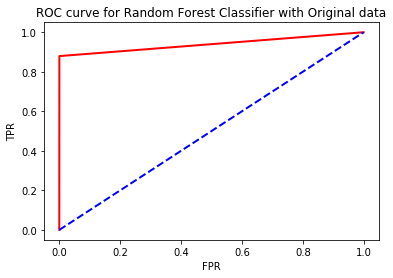

---------------------SMOTE OverSampling*
Accuracy 99.83%  *Inaccurate metric for imbalanced class
Recall Score 0.865
Precision Score 0.506
AUC Score 0.753
Confusion Matrix
[[85170   125]
 [   20   128]]


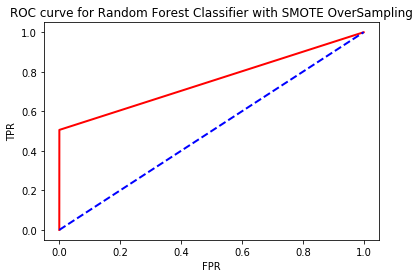

---------------------Random OverSampling*
Accuracy 95.30%  *Inaccurate metric for imbalanced class
Recall Score 0.905
Precision Score 0.0324
AUC Score 0.516
Confusion Matrix
[[81293  4002]
 [   14   134]]


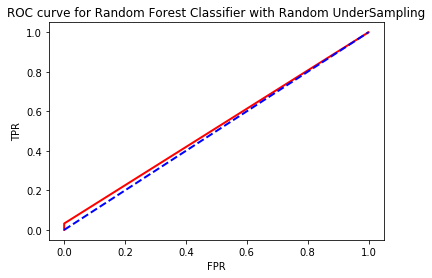

In [25]:
clf = RandomForestClassifier(n_estimators=100, random_state=12,criterion='entropy')
run_classifier(clf,"Random Forest Classifier")

END OF NOTEBOOK